In [1]:
# First we prepare the data set before making which calcualetes the weighted average.
# Because the data set has lots of missing data. Otherwise how can we expect that
# the weighted average become a usefull data.

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
pd.options.display.float_format = '{:.2f}'.format
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (5,3.5)

In [12]:
us_edu = pd.read_csv("datasets_95317_1078789_states_all.csv")

In [13]:
us_edu.drop(us_edu[us_edu["STATE"]=="NATIONAL"].index, axis=0, inplace=True)

In [14]:
us_edu.drop(us_edu[us_edu["STATE"]=="DODEA"].index, axis=0, inplace=True)

In [15]:
states=us_edu["STATE"].unique()

In [18]:
for eachcolumn in ("ENROLL","TOTAL_REVENUE","FEDERAL_REVENUE","STATE_REVENUE","LOCAL_REVENUE","TOTAL_EXPENDITURE",
                   "INSTRUCTION_EXPENDITURE","SUPPORT_SERVICES_EXPENDITURE","OTHER_EXPENDITURE","CAPITAL_OUTLAY_EXPENDITURE",
                   "GRADES_PK_G","GRADES_KG_G","GRADES_4_G","GRADES_8_G","GRADES_12_G","GRADES_1_8_G","GRADES_9_12_G",
                   "GRADES_ALL_G","AVG_MATH_4_SCORE","AVG_MATH_8_SCORE","AVG_READING_4_SCORE","AVG_READING_8_SCORE"):
    for state in states:
        us_edu[us_edu["STATE"]==state][eachcolumn].fillna(us_edu[us_edu["STATE"]==state][eachcolumn].mean())

In [1]:
# 1st Part : Making a weighted average : weighted average for math (wafm)

In [23]:
us_edu["wafm"]=(us_edu["GRADES_4_G"]*us_edu["AVG_MATH_4_SCORE"]+us_edu["GRADES_8_G"]*us_edu["AVG_MATH_8_SCORE"])/(us_edu["GRADES_4_G"]+us_edu["GRADES_8_G"])

In [31]:
us_edu[["GRADES_4_G","GRADES_8_G","AVG_MATH_4_SCORE","AVG_MATH_8_SCORE","wafm"]].head(3)

,GRADES_4_G,GRADES_8_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,wafm
0,57948.00,58025.00,208.00,252.00,230.01
1,9748.00,8789.00,234.78,280.00,256.22
2,55433.00,49081.00,215.00,265.00,238.48


In [10]:
# 2nd Part
# Examining the correlation table and heat map, total expenditure, instruction expenditure, support expenditure correlates
# at same level, however all are in a low level.

In [37]:
wc=us_edu[["TOTAL_EXPENDITURE","INSTRUCTION_EXPENDITURE","SUPPORT_SERVICES_EXPENDITURE","OTHER_EXPENDITURE","wafm"]].corr()
wc

,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,wafm
TOTAL_EXPENDITURE,1.00,0.99,0.99,0.94,0.03
INSTRUCTION_EXPENDITURE,0.99,1.00,0.98,0.91,0.03
SUPPORT_SERVICES_EXPENDITURE,0.99,0.98,1.00,0.95,0.03
OTHER_EXPENDITURE,0.94,0.91,0.95,1.00,-0.05
wafm,0.03,0.03,0.03,-0.05,1.00


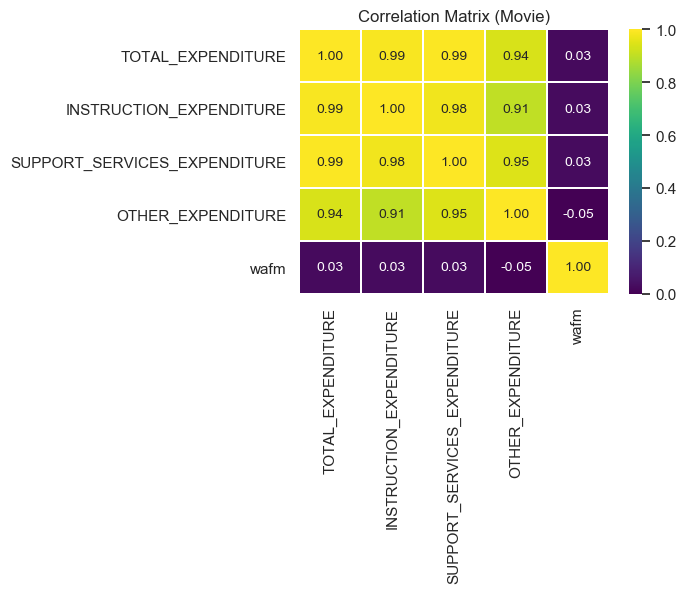

In [46]:
sns.heatmap(wc, annot=True, fmt='.2f', annot_kws={"size": 10}, linewidths=.5, vmin=0, vmax=1, cmap='viridis')
plt.title("Correlation Matrix (Movie)")

plt.show()

In [50]:
# 3rd Part

In [58]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [59]:
us_pca=us_edu[["GRADES_4_G","GRADES_8_G","AVG_MATH_4_SCORE","AVG_MATH_8_SCORE"]]

In [69]:
X=us_pca.values

In [70]:
X = StandardScaler().fit_transform(us_pca)
pca = PCA(n_components=4)
principalComponents=pca.fit_transform(X)

In [71]:
exp_var= pca.explained_variance_ratio_
cumsum_var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(exp_var)
print(cumsum_var)

[0.51784607 0.45405504 0.02747243 0.00062647]
[ 51.78  97.19  99.94 100.  ]


In [ ]:
# The first principal component PC1 explains 51,78% of the variation in the original data 

In [ ]:
# 4th Part

In [84]:
X=wc.values

In [85]:
X = StandardScaler().fit_transform(wc)
pca = PCA(n_components=4)
principalComponents=pca.fit_transform(X)

In [86]:
exp_var= pca.explained_variance_ratio_
cumsum_var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(exp_var)
print(cumsum_var)

[9.95105139e-01 4.67659857e-03 2.13255044e-04 5.00749395e-06]
[ 99.51  99.98 100.   100.  ]


In [ ]:
# The correlation between the GPA the first principal component is 99 percent

In [ ]:
# 5th Part

In [ ]:
# When I need to choose the most appropriate variables for my model, 
# I would prefer the first basic variables instead of the expenditure items.
# Because with the information of principal component I can explain
# 50 percent of my data. So I can lots of amount expenses.